For IDLE configuration:
1.  Open Anaconda
2.  Launch the CMD
3.  execute `idle`
4.  In the python shell, execute:

    `import sys`
    
    `sys.path.append('F:\\fci\\Pattern Recognation\\Week 03 - Introduction')`

# Chapter 1 - Introdcution

In [7]:
from prml.linear import (
    LinearRegression, RidgeRegression, BayesianRegression
)
from prml.preprocess import PolynomialFeature
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)


## 1.1. Example: Polynomial Curve Fitting

### Read the training dataset and test dataset

**Steps**
1.  Read the training dataset: `train_set = np.genfromtxt('Train_dataset.csv', delimiter=',')`

2.  Read the test dataset: `test_set = np.genfromtxt('Test_dataset.csv', delimiter=',')`

3.  Split the training dataset into features (x) and targets (y): `x_train, y_train = train_set[:, 0], train_set[:, 1]`

4.  Split the test dataset into features (x) and targets (y): `x_test, y_test = test_set[:, 0], test_set[:, 1]`

In [8]:
train_set = np.genfromtxt('Train dataset.csv', delimiter=',')
test_set = np.genfromtxt('Test dataset.csv', delimiter=',')

## Split the features and targets
x_train, y_train = train_set[:, 0], train_set[:, 1]
x_test, y_test = test_set[:, 0], test_set[:, 1]

Plot the training set and the test set

**Steps**
1.  Plot the training dataset using scatters: `plt.scatter(feature, target, facecolor, edgecolors, s, label)`

2.  Plot the test dataset using a line plot: `plt.plot(feature, target, color, label)`

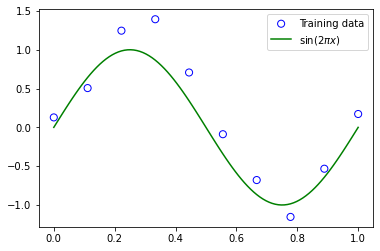

In [9]:
# plot the training dataset as scatters and plot the test dataset as line plot.
plt.scatter(x_train, y_train, facecolor='none', edgecolors='b', s=50, label='Training data')
plt.plot(x_test, y_test, color='g', label='$\sin(2 \pi x)$')
plt.legend()
plt.show()


Implement a linear regression model

$\Large y(x, \textbf{w}) = w_0 + w_1 x^1 + w_2 x^2 + w_3 x^3 + ... + w_M x^M = \sum_{j=0}^{M}{w_j x^j}$

**Steps**
1.  Define the degree of the model: `degree = ...`

2.  Transform the features of the training set and test set to the degree of the model:
    *   `feature = PolynomialFeature(degree)`
    *   `X_train = feature.transform(x_train)`
    *   `X_test = feature.transform(x_test)`<br>
    <br> 
3.  Define a linear regression model: `model = LinearRegression()`

4.  Fit the model to the training set: `model.fit(X_train, y_train)`

5.  Test the model on the features of the test set: `y = model.predict(X_test)`

6.  Plot the training dataset using scatters: `plt.scatter(feature, target, facecolor, edgecolors, s, label)`
    *   ***Note that we plot the original features not the transformed features*** <br>
    <br>
7.  Plot the test dataset using line plot: `plt.plot(feature, target, c, label)`

8.  Plot the model's prediction as a line plot: `plt.plot(feature, predictions, c, label)`

9.  Set figure limits: `plt.ylim(-1.5, 1.5)`

10. Compare how similar the predictions to the test dataset.

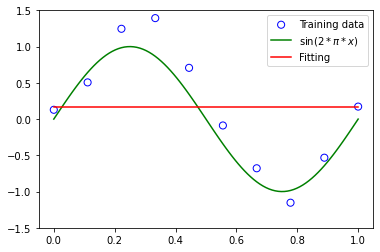

In [10]:
# implement a linear regression model of degree 0
degree = 0
# a transformer object to transform the feature vector
feature = PolynomialFeature(degree)
# transform the training features to degree 0
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)  # transform the test features to degree 0

# define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# test the predictions of the model
y = model.predict(X_test)

# plot the training dataset
plt.scatter(x_train, y_train, facecolor='none', edgecolors='b', s=50, label='Training data')

# plot the test dataset
plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')

# plot the model fitting line (predictions)
plt.plot(x_test, y, c='r', label='Fitting')

plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


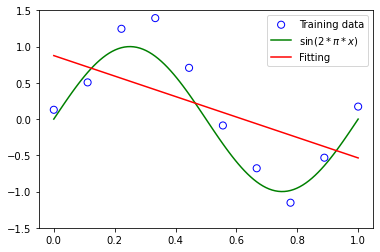

In [11]:
# implement a linear regression model of degree 1
degree = 1
# a transformer object to transform the feature vector
feature = PolynomialFeature(degree)
# transform the training features to degree 0
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)  # transform the test features to degree 0

# define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# test the predictions of the model
y = model.predict(X_test)

# plot the training dataset
plt.scatter(x_train, y_train, facecolor='none',
            edgecolors='b', s=50, label='Training data')

# plot the test dataset
plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')

# plot the model fitting line (predictions)
plt.plot(x_test, y, c='r', label='Fitting')

plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


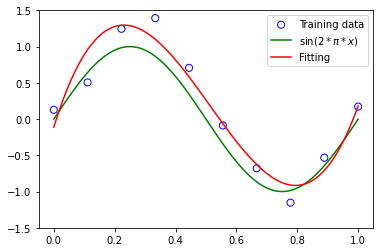

In [12]:
# implement a linear regression model of degree 3
degree = 3
# a transformer object to transform the feature vector
feature = PolynomialFeature(degree)
# transform the training features to degree 0
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)  # transform the test features to degree 0

# define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# test the predictions of the model
y = model.predict(X_test)

# plot the training dataset
plt.scatter(x_train, y_train, facecolor='none',
            edgecolors='b', s=50, label='Training data')

# plot the test dataset
plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')

# plot the model fitting line (predictions)
plt.plot(x_test, y, c='r', label='Fitting')

plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


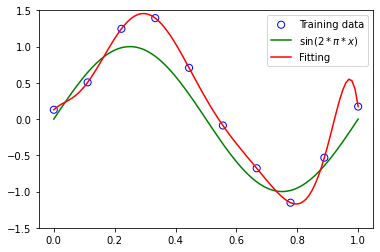

In [13]:
# implement a linear regression model of degree 9
degree = 9
# a transformer object to transform the feature vector
feature = PolynomialFeature(degree)
# transform the training features to degree 0
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)  # transform the test features to degree 0

# define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# test the predictions of the model
y = model.predict(X_test)

# plot the training dataset
plt.scatter(x_train, y_train, facecolor='none',
            edgecolors='b', s=50, label='Training data')

# plot the test dataset
plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')

# plot the model fitting line (predictions)
plt.plot(x_test, y, c='r', label='Fitting')

plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


Compare different model's degrees in one figure and print the weights of each model

**Steps**

1.  Loop through the degrees: `for i, degree in enumerate([0, 1, 3, 9]):`

    1.  Create a subplot: `plt.subplot(number of rows, number of columns, index)`

    2.  Transform the training set features and test set features to the required degree:
        *   `feature = PolynomialFeature(degree)`
        *   `X_train = feature.transform(x_train)`
        *   `X_test = feature.transform(x_test)` <br>
        <br>
    3.  Create a linear regression model: `model = LinearRegression()`

    4.  Fit the model to the training dataset: `model.fit(X_train, y_train)`

    5.  Test the model on the features of the test dataset: `y = model.predict(X_test)`

    6.  Plot the training dataset using scatters: `plt.scatter(feature, target, facecolor, edgecolors, s, label)`
        *   ***Note that we plot the original features not the transformed features*** <br>
        <br>
    7.  Plot the test dataset using line plot: `plt.plot(feature, target, c, label)`

    8.  Plot the model's prediction as a line plot: `plt.plot(feature, predictions, c, label)`

    9.  Set figure limits: `plt.ylim(-1.5, 1.5)`

`plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)`

Degree  0 model:  [0.16991575]
Degree  1 model:  [ 0.87585022 -1.41186894]
Degree  3 model:  [ -0.11112705  13.53092314 -37.89736717  24.65942417]
Degree  9 model:  [ 1.28270536e-01  4.20015948e+00 -6.37120608e+01  8.30210894e+02
 -3.46313924e+03  5.16052566e+03  6.87350227e+02 -1.01400382e+04
  1.03539497e+04 -3.36930323e+03]


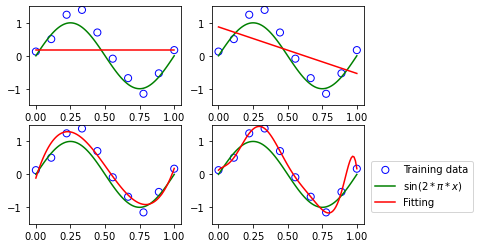

In [14]:
# compare different degrees of the model in one figure
for i, degree in enumerate([0, 1, 3, 9]):
    # create a plot of 2 rows and 2 columns. The third argument is the index of the plot
    plt.subplot(2, 2, i+1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    print("Degree ", degree, "model: ", model.w)

    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor='none',
                edgecolors='b', s=50, label='Training data')
    plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')
    plt.plot(x_test, y, c='r', label='Fitting')

    plt.ylim(-1.5, 1.5)

plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()


### Computing Error

We will compute the error using Root Mean Squared Error (RMSE) function.

$ \LARGE \sqrt{\sum_{t=1}^T\frac{({ \hat{y_t} - y_t})^2}{T}}$ 

**Steps**

1.  Define the error function:
    ```
    def rmse(a, b):
        return np.sqrt(np.mean(np.square(a - b)))
    ```
2.  Create a list for the training errors: `train_errors = []`

3.  Create a list for the test errors: `test_errors = []`

4.  Loop through 10 models' degrees: `for i in range(10):`

    1.  Transform the features into degree `i`:

        ```
        feature = PolynomialFeature(i)
        X_train = feature.transform(x_train)
        X_test = feature.transform(x_test)
        ```
    2.  Create a linear regression model: `model = LinearRegression()`

    3.  Fit a linear regression model to the training dataset: `model.fit(X_train, y_train)`

    4.  Test the model on the features of the training set: `train_preds = model.predict(X_train)`

    5.  Test the model on the features of the test set: `test_preds = model.predict(X_test)`

    6.  Compute the error on the training set: `train_err = rmse(train_preds, y_train)`

    7.  Compute the error on the test set: `test_err = rmse(test_preds, y_test)`

    8.  Print the error values:
        ```
        print("\nDegree: ", degree)
        print("\tTraining error: ", train_err)
        print("\tTest errors: ", test_err)
        ```
    9.  Append the training error to the list: `training_errors.append(train_err)`

    10.  Append the test error to the list: `test_errors.append(test_err)`

5.  Plot the training and test errors as line plot:
    ```
    plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
    plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
    plt.legend()
    plt.xlabel("degree")
    plt.ylabel("RMSE")
    ```


Degree:  9
	Training error:  0.7803261295565637
	Test errors:  0.7237895840285511

Degree:  9
	Training error:  0.6370871572738799
	Test errors:  0.49857129216451973

Degree:  9
	Training error:  0.6318558005163741
	Test errors:  0.5086958377813835

Degree:  9
	Training error:  0.21404215640846835
	Test errors:  0.22396917651315718

Degree:  9
	Training error:  0.18667810026918505
	Test errors:  0.24177415856975834

Degree:  9
	Training error:  0.07362036967694804
	Test errors:  0.2575335034070516

Degree:  9
	Training error:  0.07142622764295145
	Test errors:  0.25679840612174737

Degree:  9
	Training error:  0.053449887125918555
	Test errors:  0.2745797603703289

Degree:  9
	Training error:  0.004525984570328536
	Test errors:  0.30893974594369716

Degree:  9
	Training error:  1.1379486668638485e-10
	Test errors:  0.3203412270286783


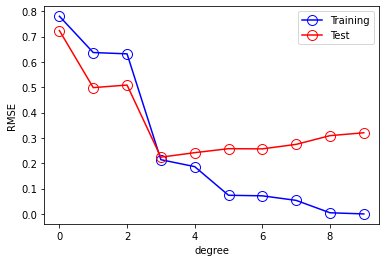

In [15]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_err = rmse(train_preds, y_train)
    test_err = rmse(test_preds, y_test)

    print("\nDegree: ", degree)
    print("\tTraining error: ", train_err)
    print("\tTest errors: ", test_err)
    
    training_errors.append(train_err)
    test_errors.append(test_err)

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

### Regulariztion

Regularization is a penalty term added to the error function to prevent coefficient from reaching large values.

To define a linear regression model with regulariztion, we will use RidgeRegression model. 

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.

$\Large E(\bf{w}) = \frac{1}{2} \sum_{n=1}^N \{{y(x_n, \bf{w}) - t_n}\}^2 + \frac{\lambda}{2} ||\bf{w}||^2$

**Steps**
1.  Transform the features to degree 9 to create an overfitted model:
    ```
    feature = PolynomialFeature(9)
    X_train = feature.transform(x_train)
    X_tet = feature.transform(x_test)
    ```
2.  Create a ridge regression model: `model = RidgeRegression(alpha=1e-4)`
    *   `alpha` is the inverse of $\lambda$. <br>
    <br>
3.  Fit the model to the training set: `model.fit(X_train, y_train)`

4.  Test the model on the features of the test set: `y = model.predict(X_test)`

5.  Print the RMSE of the model: `print("RMSE: ", rmse(preds, y_test))`

6.  Plot the training set as scatters: `plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")`

7.  Plot the test set as line plot: `plt.plot(x_test, y_test, c="g", label="Test dataset")`

8.  Plot the model's prediction as line plot: `plt.plot(x_test, y, c="r", label="fitting")`

9.  Set figure limit: `plt.ylim(-1.5, 1.5)`


RMSE:  0.2337755726845719


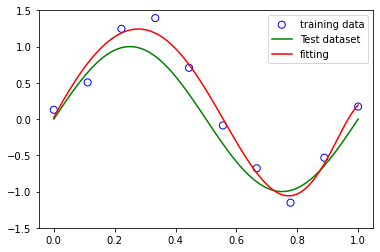

In [17]:
feature = PolynomialFeature(9)  # a model of degree 9 overfits the data
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

# alpha is similar to lambda to control the regularization strength
model = RidgeRegression(alpha=1e-4)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("RMSE: ", rmse(preds, y_test))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="Test dataset")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


## 1.2.6 Bayesian curve fitting

We will apply a regression model that implements the Baysian formula 

$\Large 𝑝(\bf{𝒘│𝒙,𝒕},\alpha,\beta) = 𝑝(\bf{𝒕│𝒙,𝒘},\beta)𝑝(\bf{𝒘}│\alpha)$

**Steps**

1.  Transform the features to degree 9 to create an overfitted model:
    ```
    feature = PolynomialFeature(9)
    X_train = feature.transform(x_train)
    X_tet = feature.transform(x_test)
    ```
2.  Create a bayesian regression model: `model = BayesianRegression(alpha=2e-3, beta=2)`

3.  Fit the model to the training dataset: `model.fit(X_train, y_train)`

4.  Test the model on the features of the test set: `y, std = model.predict(X_test, return_std=True)`
    *   Notice that we return the standard deviation of the model.<br>
    <br>
5.  Plot the training set as scatters: `plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")`

6.  Plot the test set as line plot: `plt.plot(x_test, y_test, c="g", label="Test dataset")`

7.  Plot the model's prediction as line plot: `plt.plot(x_test, y, c="r", label="fitting")`

8.  Visualize the standard deviation of the predictive distribution: `plt.fill_between(x_test, y - std, y + std, color="pink", label="std.", alpha=0.5)`

`plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)`

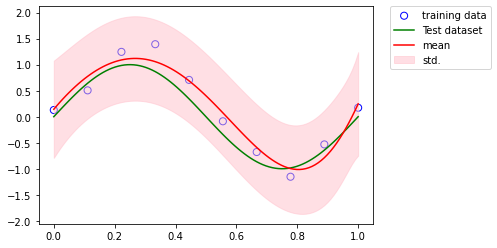

In [18]:
feature = PolynomialFeature(9)  # a model of degree 9 overfits the data
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

# this model can returns the mean and the standard deviation of the predictions
y, std = model.predict(X_test, return_std=True)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="Test dataset")
plt.plot(x_test, y, c="r", label="mean")

# visualize the standard deviation of the predictive distribution
plt.fill_between(x_test, y - std, y + std, color="pink", label="std.", alpha=0.5)


plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()


# How the dataset is created?

## The training dataset 

*   It consists of 10 samples.

*   The features are real-numbers ranging from 0 to 1.

*   The target values are computed using: $\sin{2*\pi*x}$.

*   We added random normal noise to the target values.

## The test dataset

*   It consists of 100 samples.

*   The features are real-numbers ranging from 0 to 1.

*   The target values are computed using: $\sin{(2*\pi*x)}$.

*   **No noise added to stimulate the how precise our model.**

In [ ]:
# create an artificial dataset with added gaussian noise
def create_dataset(func, sample_size, std):
    # create features of values between 0 and 1 with size sample_size
    x = np.linspace(0, 1, sample_size)
    # create the target vector computed from the function func with added noise
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t


In [ ]:
# create the function sin(2*pi*x) that resembles the target values
def my_sin(x):
    return np.sin(2 * np.pi * x)


In [ ]:
# generate the training dataset (x_train, y_train), we will create 10 samples with standard deviation 0.25
x_train, y_train = create_dataset(my_sin, 10, 0.25)

# generate test dataset with 100 samples that resembles the true underlying function
x_test = np.linspace(0, 1, 100)
y_test = my_sin(x_test)

trains = np.transpose(np.array([x_train, y_train]))
np.savetxt('Train dataset.csv',trains, delimiter=',')
tests = np.transpose(np.array([x_test, y_test]))
np.savetxt('Test dataset.csv',tests, delimiter=',')